<a href="https://colab.research.google.com/github/CurtCalledBurt/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












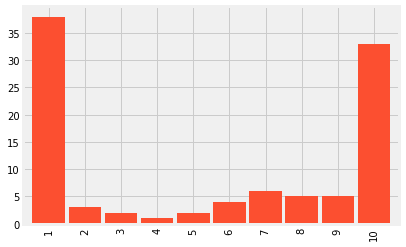

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#plt.style.use('fivethirtyeight')

fake = pd.Series([38,3,2,1,2,4,6,5,5,33],
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

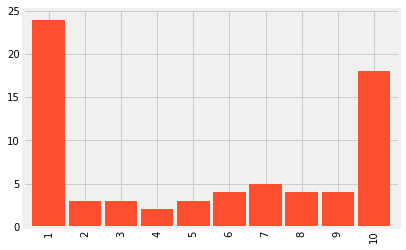

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

ax = fake2.value_counts().sort_index().plot.bar(color ='C1',width=0.9);

ax.grid(True)

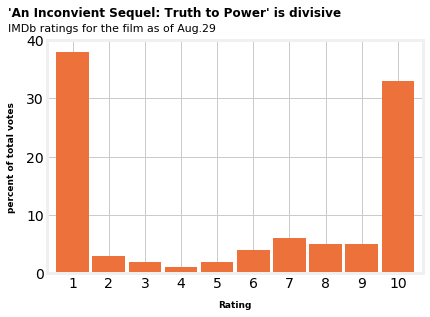

In [0]:
import matplotlib.pyplot as plt

#use 538
plt.style.use('fivethirtyeight')

#this makes the figure (frame of the graph)
fig = plt.figure()
fig.patch.set(facecolor = 'white')

# this makes the axes (not the x and y axis, this is the center of the graph)
ax = fake.plot.bar(color='#ED713A', width=0.9) #color and width of the bars
ax.set(facecolor='white')

#we make a title, there are multiple ways to do this:
#fig.suptitle('test title')
#ax.set_title('title')

#or we do this (let's us have a lot of control):
ax.text(x=-1.8, y=44, s="'An Inconvient Sequel: Truth to Power' is divisive",
       fontweight='bold',fontsize=12);
ax.text(x=-1.8, y=41.5, s="IMDb ratings for the film as of Aug.29",
       fontsize=11);

#set axis labels (rotated text objects)
ax.set_ylabel("percent of total votes", fontsize=9, fontweight='bold',
             labelpad=10)
ax.set_xlabel("Rating",fontsize=9, fontweight='bold',labelpad=10)

#correct the tick lables. Once again these are text objects
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0,50,10))

#colab auto prints the last thing done in the box. 
#which is a funny text thing here, so suppress it
#by no longer making it the last output
plt.show()


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

df.tail(5)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace=True)
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [0]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail(30)

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 18:20:06.215486,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:30:06.738669,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:40:05.771150,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 18:50:06.051326,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:00:06.002542,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:10:06.066863,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:20:06.286871,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:30:06.395003,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8
2017-08-29 19:40:06.372808,2654,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,108,152,146,144,896,38.5,2.6,1.4,0.9,2.1,4.1,5.7,5.5,5.4,33.8


In [0]:
df['category'].value_counts()

Females Aged 18-29    4216
Aged 45+              4216
Females Aged 30-44    4216
US users              4216
Females               4216
Aged 30-44            4216
Top 1000 voters       4216
IMDb users            4216
Males Aged 45+        4216
Aged under 18         4216
IMDb staff            4216
Non-US users          4216
Males under 18        4216
Males Aged 18-29      4216
Males                 4216
Females Aged 45+      4216
Males Aged 30-44      4216
Aged 18-29            4216
Females under 18      4165
Name: category, dtype: int64

In [12]:
lastday_filtered.respondents.plot()

NameError: ignored

In [0]:
#transposing something can make for less scrolling
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


<Figure size 432x288 with 0 Axes>

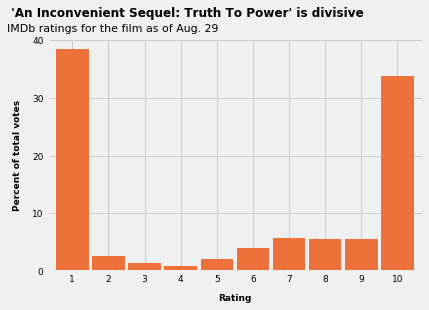

In [72]:
#Now we can make the graph with the actual data
import matplotlib.pyplot as plot
#538 style
plt.style.use('fivethirtyeight')

#generate figure
fig = plt.figure()
fig.patch.set(facecolor='white')

#make our axes (center graph part) for the plot
ax = plot_data.plot.bar(color='#ED713A', width=0.9);
ax.set(facecolor='white');
ax.patch.set_alpha(0);

#move the same code we made while messing with the fake data
#down here as those are the settings we need

ax.text(x=-1.8, y=44, s=" 'An Inconvenient Sequel: Truth To Power' is divisive",
       fontweight='bold',fontsize=12);
ax.text(x=-1.8, y=41.5, s="IMDb ratings for the film as of Aug. 29",
       fontsize=11);

#set x and y axis
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold',
              labelpad=10);
ax.set_xlabel('Rating', fontsize=9, fontweight='bold', labelpad=10);

#set tick lables
ax.set_xticklabels(range(1,11), rotation=0, fontsize=9);
ax.set_yticks(range(0,50,10));
ax.set_yticklabels(range(0,50,10), fontsize=9);

#kill the legend
ax.get_legend().remove();

plt.show();

In [1]:
#new chart

# link:
#https://fivethirtyeight.com/features/louisiana-tech-was-the-uconn-of-the-80s/
#It's about halfway down, the Louisiana tech chart

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

Saving ncaa-womens-basketball-tournament-history.csv to ncaa-womens-basketball-tournament-history (1).csv


In [0]:
data = pd.read_csv('ncaa-womens-basketball-tournament-history.csv')

In [16]:
data.head()

,Year,School,Seed,Conference,Conf. W,Conf. L,Conf. %,Conf. place,Reg. W,Reg. L,Reg. %,How qual,1st game at home?,Tourney W,Tourney L,Tourney finish,Full W,Full L,Full %
0,1982,Arizona St.,4,Western Collegiate,-,-,-,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4
1,1982,Auburn,7,Southeastern,-,-,-,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8
2,1982,Cheyney,2,Independent,-,-,-,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3
3,1982,Clemson,5,Atlantic Coast,6,3,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5
4,1982,Drake,4,Missouri Valley,-,-,-,-,26,6,81.3,auto,Y,2,1,RF,28,7,80


In [22]:
data.isna().sum()

Year                 0
School               0
Seed                 0
Conference           0
Conf. W              0
Conf. L              0
Conf. %              0
Conf. place          0
Reg. W               0
Reg. L               0
Reg. %               0
How qual             0
1st game at home?    0
Tourney W            0
Tourney L            0
Tourney finish       0
Full W               0
Full L               0
Full %               0
dtype: int64

In [26]:
data.dtypes

Year                   int64
School                object
Seed                  object
Conference            object
Conf. W               object
Conf. L               object
Conf. %               object
Conf. place           object
Reg. W                 int64
Reg. L                 int64
Reg. %               float64
How qual              object
1st game at home?     object
Tourney W              int64
Tourney L              int64
Tourney finish        object
Full W                 int64
Full L                 int64
Full %                object
dtype: object

In [28]:
data['Seed'].value_counts()

1       149
3       149
5       149
7       149
4       148
2       147
6       147
8       141
10      132
9       131
12      123
11      120
16      101
15      100
13       99
14       99
(OR)      8
Name: Seed, dtype: int64

In [0]:
data['Seed'] = data['Seed'].map({'1':100, '2':70, '3':55, '4':41, '5':37, '6':28, '7':22, '8':17, '9':13, '10':11, 
                                 '11':9, '12':7, '13':5, '14':3, '15':1, '16':0, '(OR)':0})

In [38]:
data.dtypes

Year                   int64
School                object
Seed                   int64
Conference            object
Conf. W               object
Conf. L               object
Conf. %               object
Conf. place           object
Reg. W                 int64
Reg. L                 int64
Reg. %               float64
How qual              object
1st game at home?     object
Tourney W              int64
Tourney L              int64
Tourney finish        object
Full W                 int64
Full L                 int64
Full %                object
dtype: object

In [37]:
data['Seed'].value_counts()

55     149
37     149
100    149
22     149
41     148
70     147
28     147
17     141
11     132
13     131
7      123
9      120
0      109
1      100
5       99
3       99
Name: Seed, dtype: int64

In [0]:
#seeds are now ints too, so we're ready to go
LT = data[data['School'] == 'Louisiana Tech']

In [109]:
LT_year_seed = LT[['Year', 'Seed']]
LT_year_seed

,Year,Seed
14,1982,100
47,1983,100
77,1984,100
108,1985,100
142,1986,70
183,1987,100
226,1988,70
268,1989,100
312,1990,100
364,1991,11


In [110]:
LT_year_seed = LT_year_seed[['Year','Seed']].reset_index()
LT_year_seed = LT_year_seed[['Year','Seed']]
LT_year_seed

,Year,Seed
0,1982,100
1,1983,100
2,1984,100
3,1985,100
4,1986,70
5,1987,100
6,1988,70
7,1989,100
8,1990,100
9,1991,11


In [111]:
LT_year_seed_plot = LT_year_seed.set_index('Year')
LT_year_seed_plot

,Seed
Year,
1982,100
1983,100
1984,100
1985,100
1986,70
1987,100
1988,70
1989,100
1990,100


<Figure size 432x288 with 0 Axes>

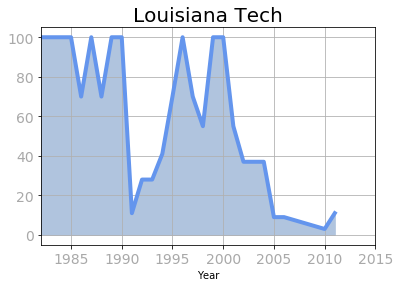

In [142]:
import matplotlib.pyplot as plt

#figure
fig = plt.figure()
fig.patch.set(facecolor='silver')

#axes
ax = LT_year_seed_plot.plot.line(color = 'cornflowerblue',
                                linewidth = 4)

ax.set(facecolor='lightgray')
ax.patch.set_alpha(0)
ax.grid()
ax.fill_between(LT_year_seed['Year'], 
                LT_year_seed['Seed'], 
                color = 'lightsteelblue')

#title
ax.set_title("Louisiana Tech",
             #fontweight='bold',
             fontsize=20)

#axis

#ticks
ax.set_xticks(range(1985,2020,5))
ax.set_xticklabels(range(1985,2025,5), 
                   color = 'darkgray',
                   fontsize=14)
ax.set_yticks(range(0,120,20))
ax.set_yticklabels(range(0,120,20), 
                   color = 'darkgray',
                   fontsize = 14)


ax.get_legend().remove()
plt.show()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here